In [ ]:
# default_exp umap

# UMAP

> API details.

In [2]:
#hide
from nbdev.showdoc import *

In [3]:
# %load common.py
# export

import pandas
import os
import numpy
import seaborn
import logging
import matplotlib.pyplot as plt
from importlib import reload
from ehv import core

numpy.random.seed(42)

In [36]:
# export 

import umap
import fcsparser
from joblib import load, dump
import sklearn.model_selection
from multiprocessing import Pool
from imblearn import under_sampling
from tqdm import tqdm

In [37]:
from tqdm.notebook import tqdm

In [5]:
core.load_config("../config_cn1346.yml")

In [6]:
meta, df = fcsparser.parse(core.FCS_NONINTENSITY)
df_meta = df[["label", "replicate", "timepoint"]].astype(int)
df_meta["timepoint"] = df_meta["timepoint"].map(lambda a: meta["timepoint"].split(",")[a])
df_meta["replicate"] = df_meta["replicate"].map(lambda a: meta["replicate"].split(",")[a])
df = df.drop(columns=["label", "replicate", "timepoint"])

# All non fluor-intensity features

In [6]:
projector = umap.UMAP()
projection = projector.fit_transform(df)
projection = pandas.DataFrame(projection, columns=["dim_1", "dim_2"])

In [12]:
dump(projection, "D:/Experiment_data/weizmann/EhV/201/aggregates/umap_non_intensity_T0234567_R123.dat")

['D:/Experiment_data/weizmann/EhV/201/aggregates/umap_non_intensity_T0234567_R123.dat']

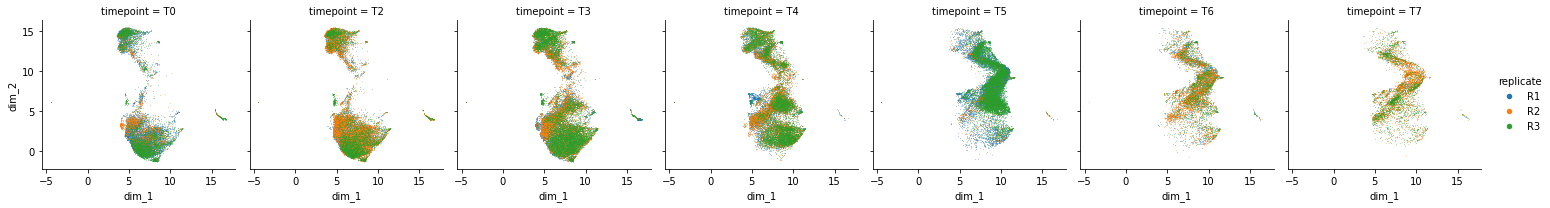

In [7]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([df, df_meta, projection], axis=1))
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5, linewidths=0, edgecolors=None, alpha=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)

# BF

In [7]:
todrop = df.filter(regex="(?i).*(TMR|MCP|Cy5|DAPI|M06|Ch06|M07|Similarity)")
df_bf = df.drop(columns=todrop)

In [8]:
df_bf.head()

,AreaM01,AreaLevelSet(M01BFDim5),MaxPixelLevelSet(M01BFDim5)BF,AspectRatioLevelSet(M01BFDim5),GradientRMSM01BF,AngleM01,HeightObject(M01BFTight),MinPixelLevelSet(M01BFDim5)BF,CentroidYObject(M01BFTight),AspectRatioIntensityObject(M01BFTight)BF,...,AspectRatioIntensityLevelSet(M01BFDim5)BF,GradientRMSLevelSet(M01BFDim5)BF,MeanPixelObject(M01BFTight)BF,CentroidYIntensityM01BF,MaxPixelM01BF,MedianPixelLevelSet(M01BFDim5)BF,MedianPixelObject(M01BFTight)BF,GradientMaxM01BF,MeanPixelM01BF,AreaObject(M01BFTight)
0,-0.360266,-0.489726,0.545377,0.422263,-0.561803,-1.017752,1.000086,0.392709,-0.051788,-1.255205,...,1.220630,0.610526,-0.934192,0.166228,-0.091232,-0.466496,0.462132,0.043642,0.671636,0.657451
1,-1.054074,0.963268,-0.338201,-0.339254,0.349700,1.501196,0.629514,0.235763,-1.094018,0.478160,...,-0.571321,0.330142,1.290296,-1.135900,-0.642681,0.077533,-1.403891,0.104332,-1.774979,0.796741
2,0.007877,-0.237031,0.095262,0.881175,0.684847,1.555930,-0.111631,0.096121,1.438205,0.250212,...,0.351382,0.381059,0.175500,1.277209,-0.602496,-0.484861,-0.218857,0.303522,-0.663559,-0.158387
3,0.630888,0.078837,-0.581384,0.621299,0.917606,1.037936,-0.852776,-0.545140,0.945624,-0.509781,...,0.283813,0.699018,0.538141,0.934039,0.160051,0.464639,-1.013830,-1.196783,-0.672166,-1.352298
4,1.310537,0.015663,-0.552736,-0.791075,-2.198850,-0.066139,-1.223349,-0.084850,-2.832966,1.110029,...,-1.586028,-2.133334,1.377900,-2.532064,-0.774068,0.083806,-1.495653,-0.581514,-3.299746,-0.755343


In [9]:
rus = under_sampling.RandomUnderSampler(sampling_strategy="all")
bf_df_us, df_meta_us = rus.fit_resample(df_bf, df_meta["replicate"]+df_meta["timepoint"])

In [10]:
projector = umap.UMAP()
projection = projector.fit_transform(bf_df_us)
projection = pandas.DataFrame(projection, columns=["dim_1", "dim_2"])

/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/umap/nndescent.py:91: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../..

In [25]:
dump(projection, "D:/Experiment_data/weizmann/EhV/201/aggregates/umap_non_intensity_T0234567_R123_bf.dat")

['D:/Experiment_data/weizmann/EhV/201/aggregates/umap_non_intensity_T0234567_R123_bf.dat']

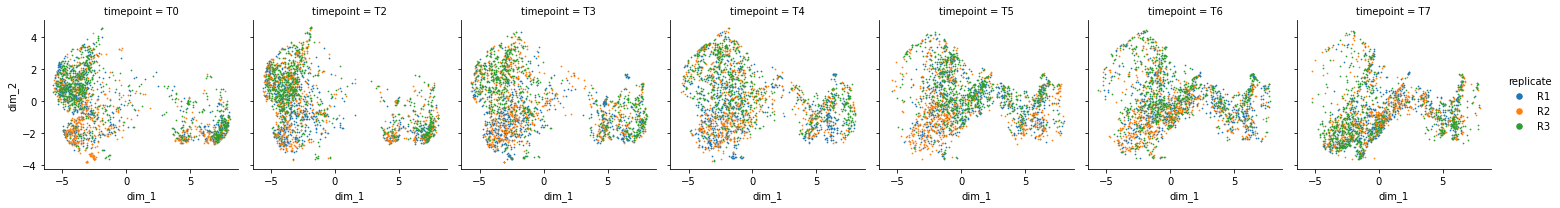

In [34]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([projection.reset_index(), df_meta.iloc[rus.sample_indices_].reset_index()], axis=1))
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)

### Grid sweep over UMAP params

In [25]:
bf_df_us, bf_meta_us = under_sampling.RandomUnderSampler(sampling_strategy="all").fit_resample(df_bf, df_meta["replicate"]+df_meta["timepoint"])

In [40]:
param_grid = sklearn.model_selection.ParameterGrid({
    "n_neighbors": [5, 50, 500],
    "min_dist": [0.01, 0.1],
    "metric": ["mahalanobis", "correlation"]
})

def fit_umap(df, params):
    projector = umap.UMAP(**params)
    projection = projector.fit_transform(df)
    return pandas.DataFrame(projection, columns=["dim_1", "dim_2"])

with Pool(processes=8) as pool:
    results = []
    for params in param_grid:
        results.append(pool.apply_async(fit_umap, (bf_df_us, params)))
        
    frames = []
    for result in tqdm(results):
        frames.append(result.get())

(14826, 72)
(14826, 72)
(14826, 72)
(14826, 72)
(14826, 72)
(14826, 72)
(14826, 72)
(14826, 72)


/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndesc

(14826, 72)


/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/umap/umap_.py:285: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  warn(


(14826, 72)


/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/umap/umap_.py:285: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  warn(


(14826, 72)


/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


(14826, 72)


/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/maximl/.conda/envs/ml/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../.conda/envs/ml/lib/python3.8/site-packages/umap/nndesc

KeyboardInterrupt: 

# Fluor intensity

In [7]:
_, fluor_df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/fluor_T0234567_R123.fcs")

In [9]:
fluor_df = fluor_df.filter(regex=".*logicle")

In [10]:
fluor_df.head()

,IntensityMCTMRlogicle,IntensityMCCy5logicle,IntensityMCDAPIlogicle
0,0.236183,0.681719,0.626471
1,0.140310,0.687941,0.599785
2,0.050491,0.744134,0.712355
3,0.277069,0.746305,0.694561
4,0.065921,0.824829,0.671332


In [11]:
projector = umap.UMAP()
projection = projector.fit_transform(fluor_df)
projection = pandas.DataFrame(projection, columns=["dim_1", "dim_2"])

In [12]:
dump(projection, "D:/Experiment_data/weizmann/EhV/201/aggregates/umap_fluor_intensity_T0234567_R123_bf.dat")

['D:/Experiment_data/weizmann/EhV/201/aggregates/umap_fluor_intensity_T0234567_R123_bf.dat']

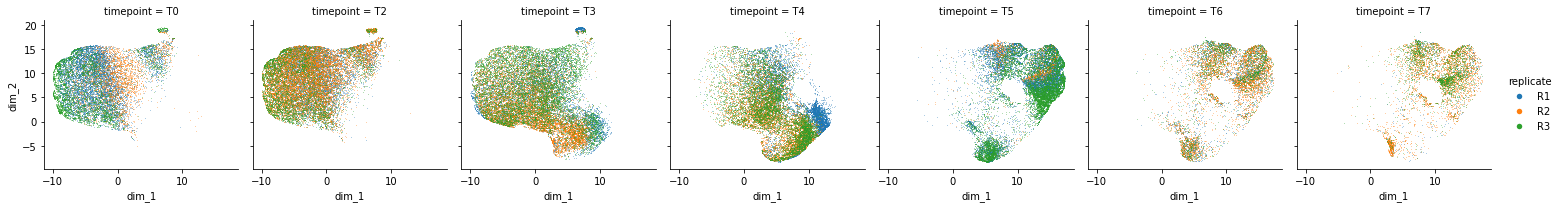

In [13]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([df_meta, projection], axis=1))
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5, linewidths=0, edgecolors=None, alpha=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)